In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F

In [2]:
from struct import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ucitavanje_slika(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_slika = unpack(">I", fp.read(4))[0]
        broj_redova = unpack(">I", fp.read(4))[0]
        broj_kolona = unpack(">I", fp.read(4))[0]
        
        slike = np.frombuffer(fp.read(broj_slika*broj_redova*broj_kolona), dtype=np.uint8).reshape((broj_slika, broj_redova, broj_kolona))
        slike = slike.astype(np.float32)
        return slike

def ucitavanje_labela(putanja):
    with open(putanja, "rb") as fp:
        magic_number = unpack(">I", fp.read(4))
        broj_labela = unpack(">I", fp.read(4))[0]
        labele = np.frombuffer(fp.read(broj_labela), dtype=np.uint8)
        return labele

In [25]:
class MnistDataset(Dataset):
    def __init__(self, putanja_do_slika, putanja_do_labela):
        super().__init__()
        
        self.cifre = ucitavanje_slika(putanja_do_slika)
        self.labele_cifri = ucitavanje_labela(putanja_do_labela)
        
        # self.podaci = list(zip(slike.reshape(len(slike), 1, slike[0].shape[0], slike[0].shape[1]) , labele))
        self.podaci = []
        self.pravljenje_velikih_slika()
        
    def pravljenje_velikih_slika(self):
        dimenizije = 250
        for i in range(250):
            slika = np.zeros((1, dimenizije, dimenizije), dtype=np.float32)
            labela = np.zeros((10, dimenizije, dimenizije), dtype=np.float32)
            odabrane_cifre = np.random.choice(len(self.cifre), 4)

            koordinate_cifara = np.random.randint(0, dimenizije-28, size=(4, 2))

            for i, odabrana_cifra in enumerate(odabrane_cifre):
                slika[0][koordinate_cifara[i][0]:koordinate_cifara[i][0]+28, koordinate_cifara[i][1]:koordinate_cifara[i][1]+28] = self.cifre[odabrana_cifra]
                labela[self.labele_cifri[odabrana_cifra]][koordinate_cifara[i][0]:koordinate_cifara[i][0]+28, koordinate_cifara[i][1]:koordinate_cifara[i][1]+28] = 1

            self.podaci.append((slika, labela))
    def __getitem__(self, indeks):
        return self.podaci[indeks]
    
    def __len__(self):
        return len(self.podaci)


In [26]:
train_dataset = MnistDataset("train-images.idx3-ubyte", "train-labels.idx1-ubyte")
test_dataset = MnistDataset("t10k-images.idx3-ubyte", "t10k-labels.idx1-ubyte")

In [27]:
train_podaci = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_podaci = DataLoader(test_dataset, batch_size=4, shuffle=True)

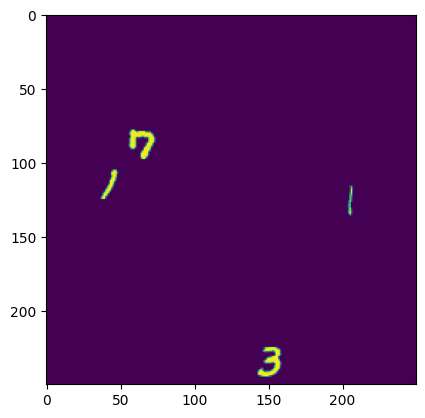

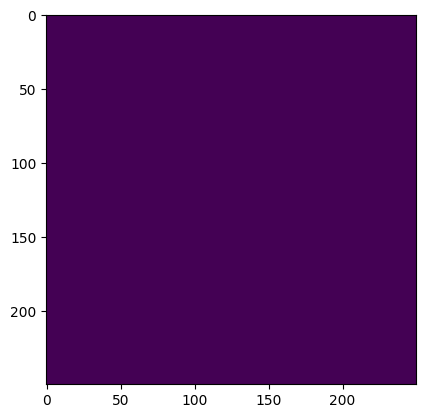

In [35]:
slika_i_labela = iter(test_podaci).__next__()

plt.figure()
plt.imshow(slika_i_labela[0][0][0])
plt.show()

plt.figure()
plt.imshow(slika_i_labela[1][0][0])
plt.show()

In [48]:
class CNNMreza(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 30, 3, padding=1)
        self.c2 = nn.Conv2d(30, 15, 3, padding=1)
        self.c3 = nn.Conv2d(15, 5, 3, padding=1)
        self.c4 = nn.Conv2d(5, 10, 3, padding=1)
    
    def forward(self, x):
        c1_izlaz = (self.c1(x))
        c2_izlaz = (self.c2(c1_izlaz))
        c3_izlaz = (self.c3(c2_izlaz))
        c4_izlaz = F.sigmoid(self.c4(c3_izlaz))
        return c4_izlaz

In [51]:
cnn_mreza = CNNMreza()

funkcija_greske = nn.MSELoss()
optimizer = torch.optim.RMSprop(cnn_mreza.parameters(), lr=0.00001)

broj_epoha = 30

for i in range(broj_epoha):
    for (x, y) in train_podaci:
        yp = cnn_mreza(x)
        
        optimizer.zero_grad()
        greska = funkcija_greske(yp, y)
        greska.backward()
        optimizer.step()
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


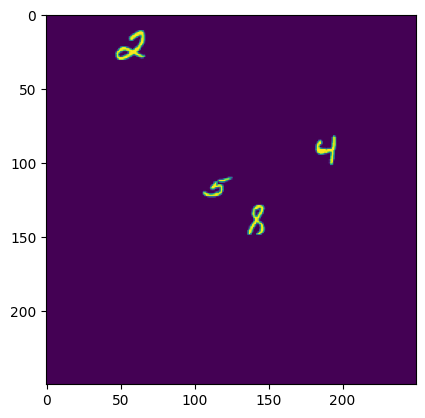

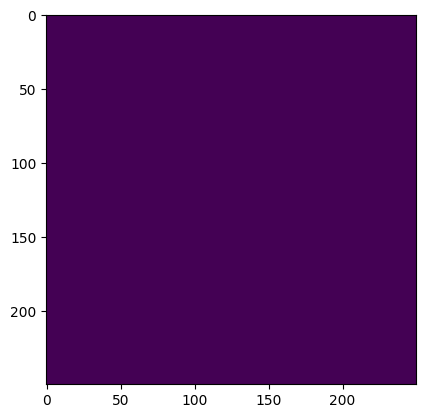

0


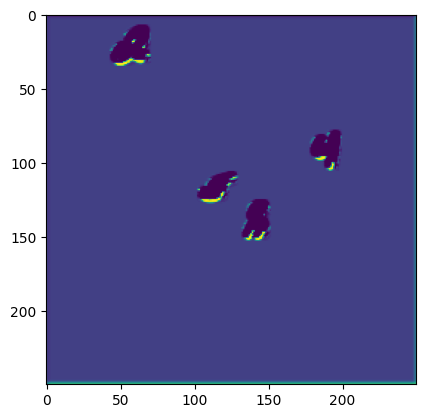

1


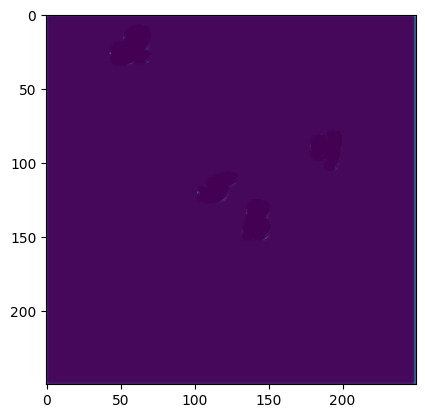

2


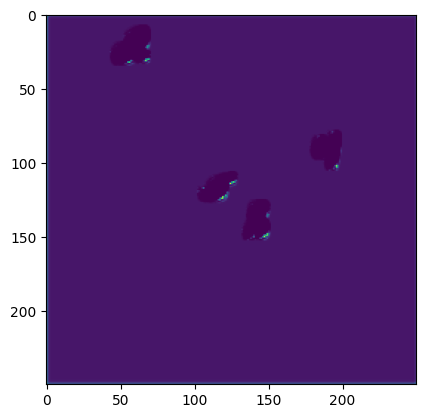

3


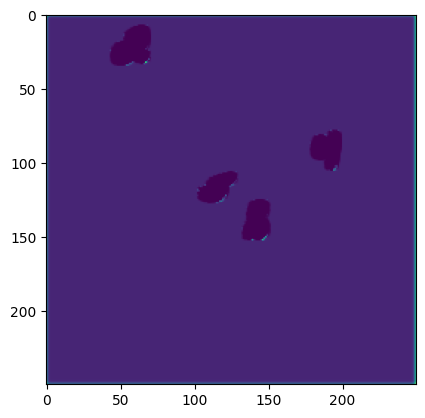

4


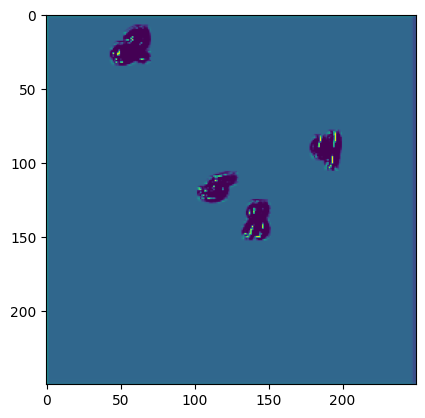

5


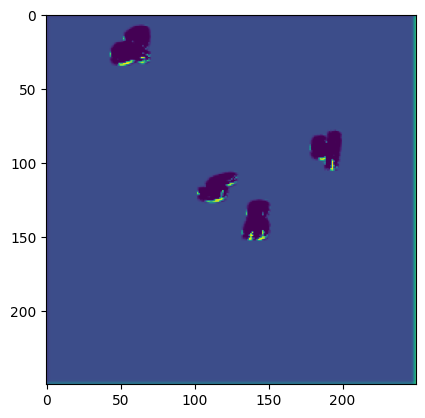

6


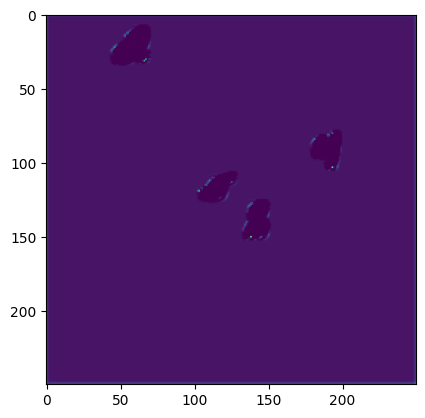

7


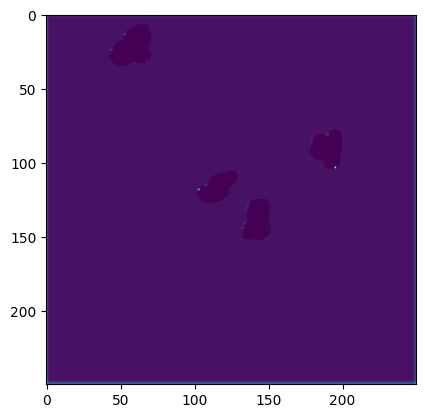

8


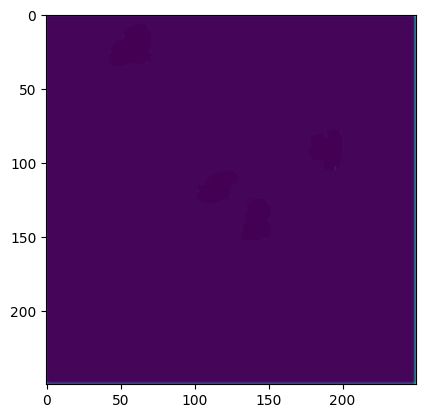

9


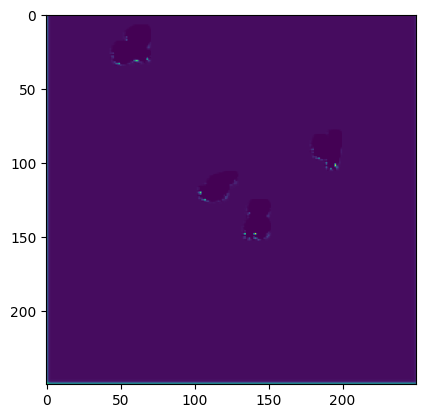

In [52]:
slika_i_labela = iter(test_podaci).__next__()

rezultat = cnn_mreza(slika_i_labela[0][0]).detach().numpy()

plt.figure()
plt.imshow(slika_i_labela[0][0][0])
plt.show()

plt.figure()
plt.imshow(slika_i_labela[1][0][0])
plt.show()

for i in range(len(rezultat)):
    print(i)
    plt.figure()
    plt.imshow(rezultat[i])
    plt.show()